Name: Zhuoyuan Xu

NetID: zx1137

Due Date: March 15, 2021

# Support Vector Machines: SVMs with Pegasos

**Problem 1**

The definition of the subdifferential of function $f$ at $x$ is
$$\partial f(x)=\{g|f(z)\geq f(x)+g^T(z-x), \forall z\in dom f\}$$

Given $g\in\partial f_k(x)$, by definition, then for all z, $$f_k(z)\geq f_k(x)+g^T(z-x)$$

In this problem, we let k be any index for which $f_k(x)=f(x)$, and $f(x)=max_{i=1,...,m}f_i(x)$. Also note that $f_1,...,f_m$ are convex functions.

Then, $$f(z)\geq f(x)+g^T(z-x)$$

This shows $g\in\partial f(x)$.

**Problem 2**

The hinge loss objective can be re-written as 
$$\begin{equation}
  J(w)=\begin{cases}
    1-yw^Tx, & \text{if $yw^Tx<1$}\\
    0, & \text{otherwise}
  \end{cases}
\end{equation}$$

We can see that the gradient is undefined at $yw^Tx=1$, but when $yw^Tx>1$ or $yw^Tx<1$, the function is differentiable. For the differentiable part, the derivative is equivalent to the subgradient. For the non-differentiable point, 0 actually satisfies the definition of subgradient.

Thus, the subgradient of hinge loss can be computed as
$$\begin{equation}
  g_{J(w)}=\begin{cases}
    -yx, & \text{if $yw^Tx<1$}\\
    0, & \text{if $yw^Tx\geq 1$}
  \end{cases}
\end{equation}$$

**Problem 3**

To clear up the symbols, we can define the derivative of hinge loss as
$$\begin{equation}
  l'(yw^Tx)=\begin{cases}
    -yx, & \text{if $yw^Tx<1$}\\
    0, & \text{if $yw^Tx>1$}\\
    \text{undefined}, & \text{if $yw^Tx=1$}
  \end{cases}
\end{equation}$$

To compute the gradient of hinge loss with respect to w, 
$$\begin{split}\nabla_wl(y_iw^Tx_i)&=l'(y_iw^Txi)y_ix_i\\&=
\begin{cases}
    -y_ix_i, & \text{if $yw^Tx<1$}\\
    0, & \text{if $yw^Tx>1$}\\
    \text{undefined}, & \text{if $yw^Tx=1$}
  \end{cases}\end{split}$$

So, $$\begin{split}\nabla_wJ_i(w)&=\nabla_w(l(y_iw^Tx_i)+\frac{1}{2}\lambda||w||^2)\\&=\nabla_wl(y_iw^Tx_i)+\lambda w\\&=\begin{cases}
    -y_ix_i+\lambda w, & \text{if $yw^Tx<1$}\\
    \lambda w, & \text{if $yw^Tx>1$}\\
    \text{undefined}, & \text{if $yw^Tx=1$}
  \end{cases}\end{split}$$

**Problem 4**

In $J_i(w)$, set $f(w)=\frac{\lambda}{2}||w||^2$. This function is differentiable, and the derivative is $$\nabla f(w)=\lambda w$$

Both $f(w)$ and hinge loss $l$ are convex functions. 

Thus, $$\partial J_i(w)=\partial f(w)+\partial l$$

In problem 2, the subgradient of hinge loss is given by 
$$\begin{equation}
  g_l=\begin{cases}
    -y_ix_i, & \text{if $y_iw^Tx_i<1$}\\
    0, & \text{if $y_iw^Tx_i\geq 1$}
  \end{cases}
\end{equation}$$

Thus the subgradient for $J_i(w)$ can be given by
$$\begin{equation}
  gw=\begin{cases}
    \lambda w-y_ix_i, & \text{if $y_iw^Tx_i<1$}\\
    \lambda w, & \text{if $y_iw^Tx_i\geq 1$}
  \end{cases}
\end{equation}$$

**Problem 5**

In [2]:
import os
import numpy as np
import random
from collections import Counter
from sklearn.model_selection import train_test_split
from collections import defaultdict
import timeit
import matplotlib.pyplot as plt

def sparse_represent(word_list):
    dic = Counter(word_list)
    return dic

**Problem 6**

In [3]:
def folder_list(path,label):
    '''
    PARAMETER PATH IS THE PATH OF YOUR LOCAL FOLDER
    '''
    filelist = os.listdir(path)
    review = []
    for infile in filelist:
        file = os.path.join(path,infile)
        r = read_data(file)
        r.append(label)
        review.append(r)
    return review

def read_data(file):
    '''
    Read each file into a list of strings.
    Example:
    ["it's", 'a', 'curious', 'thing', "i've", 'found', 'that', 'when', 'willis', 'is', 'not', 'called', 'on',
    ...'to', 'carry', 'the', 'whole', 'movie', "he's", 'much', 'better', 'and', 'so', 'is', 'the', 'movie']
    '''
    f = open(file)
    lines = f.read().split(' ')
    symbols = '${}()[].,:;+-*/&|<>=~" '
    words = map(lambda Element: Element.translate(str.maketrans("", "", symbols)).strip(), lines)
    words = filter(None, words)
    return list(words)


def load_and_shuffle_data():
    '''
    pos_path is where you save positive review data.
    neg_path is where you save negative review data.
    '''
    pos_path = "data_reviews/pos"
    neg_path = "data_reviews/neg"

    pos_review = folder_list(pos_path,1)
    neg_review = folder_list(neg_path,-1)

    review = pos_review + neg_review
    random.shuffle(review)
    return review

# Taken from http://web.stanford.edu/class/cs221/ Assignment #2 Support Code
def dotProduct(d1, d2):
    """
    @param dict d1: a feature vector represented by a mapping from a feature (string) to a weight (float).
    @param dict d2: same as d1
    @return float: the dot product between d1 and d2
    """
    if len(d1) < len(d2):
        return dotProduct(d2, d1)
    else:
        return sum(d1.get(f, 0) * v for f, v in d2.items())

def increment(d1, scale, d2):
    """
    Implements d1 += scale * d2 for sparse vectors.
    @param dict d1: the feature vector which is mutated.
    @param float scale
    @param dict d2: a feature vector.

    NOTE: This function does not return anything, but rather
    increments d1 in place. We do this because it is much faster to
    change elements of d1 in place than to build a new dictionary and
    return it.
    """
    for f, v in d2.items():
        d1[f] = d1.get(f, 0) + v * scale

In [34]:
word_list = load_and_shuffle_data()

In [35]:
X = []
y = []
for idx in range(len(word_list)):
    doc = word_list[idx][0:len(word_list[idx])-1]
    X.append(sparse_represent(doc))
    y.append(word_list[idx][-1])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1500)

**Problem 7**

In [7]:
def pegasos(X_train, y_train, lamda, num_epoch):
    w = defaultdict(float)
    t = 0.0

    iterate = 0
    while iterate < num_epoch:
        for j in range(len(X_train)):
            t += 1
            eta = 1/(lamda*t)
            if y_train[j]*dotProduct(X_train[j], w)< 1:
                increment(w, -eta*lamda, w)
                increment(w, eta*y_train[j], X_train[j])
            else:
                increment(w, -eta*lamda, w)
        iterate += 1
    return w

In [8]:
lamda = 0.05 # arbitrarily chosen for demo
num_epoch = 10

In [ ]:
w = pegasos(X_train, y_train, lamda, num_epoch)

**Problem 8**

We can represent $w=sW$ where $s\in R$ and $W\in R^d$, the expression of $w_{t+1}$ can be written as $$\begin{split}w_{t+1}&=s_{t+1}W_{t+1}\\&=((1-\eta\lambda)s_t)(W_t+\frac{1}{((1-\eta\lambda)s_t)}\eta_ty_jx_j)\\&=(1-\eta_t\lambda)s_tW_t+\frac{((1-\eta_t\lambda)s_t)}{((1-\eta_t\lambda)s_t)}\eta_ty_jx_j\\&=(1-\eta_t\lambda)w_t+\eta_ty_jx_j\end{split}$$
Thus the 2 update methods are equivalent.

In [9]:
def pegasos_sW(X_train, y_train, lamda, num_epoch):
    W = defaultdict(float)
    s = 1
    t = 2.0

    iterate = 0
    while iterate < num_epoch:
        for j in range(len(X_train)):
            t += 1
            eta = 1/(lamda*t)
            if y_train[j]*s*dotProduct(X_train[j], W) < 1:
                s = (1-eta*lamda)*s
                increment(W, 1/s*eta*y_train[j], X_train[j])
            else:
                s = (1-eta*lamda)*s
        iterate += 1
    for key in W.keys():
        W[key] = s*W[key]
    return W

**Problem 9**

In [10]:
start = timeit.default_timer()
w = pegasos(X_train, y_train, lamda, num_epoch)
end = timeit.default_timer()
print('Time for original Pegasos algorithm:', end-start)

Time for original Pegasos algorithm: 74.14767160000008


In [11]:
start = timeit.default_timer()
w_new = pegasos_sW(X_train, y_train, lamda, num_epoch)
end = timeit.default_timer()
print('Time for new Pegasos algorithm:', end-start)

Time for new Pegasos algorithm: 1.0925968999999895


In [12]:
w['would']

-0.08666666666666681

In [13]:
w_new['would']

-0.08665511265164587

In [14]:
err = []
for i, v in w.items():
    err.append(np.abs(w[i] - w_new[i]))
print('The mean absolute error between the w found by 2 different algorithms is', np.mean(err))

The mean absolute error between the w found by 2 different algorithms is 1.3529813578390048e-06


This result shows that the 2 algorithms return the same result, and the error is acceptable noting we only run 10 epoches.

**Problem 10**

In [15]:
def classification_error(w, X, y):
    prediction = np.zeros(len(y))
    for i in range(len(y)):
        dp = dotProduct(w, X[i])
        if dp >= 0:
            prediction[i] = 1
        elif dp < 0:
            prediction[i] = -1
    res = np.sum([abs(x-y)<0.001 for (x,y) in zip(y, prediction)])
    return 1-res/len(y)

**Problem 11**

In [37]:
lamda = [0.0001, 0.001, 0.01, 0.1, 1, 10]
num_epoch = 50
err = []
for i in range(len(lamda)):
    w = pegasos_sW(X_train, y_train, lamda[i], num_epoch)
    err.append(classification_error(w, X_test, y_test))

Text(0, 0.5, 'Classification Error')

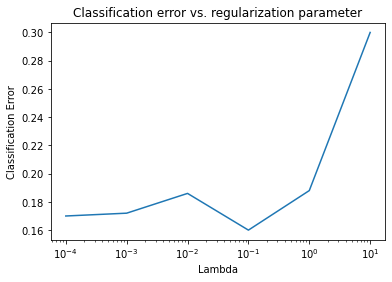

In [38]:
plt.plot(lamda, err)
plt.title('Classification error vs. regularization parameter')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Classification Error')

Text(0, 0.5, 'Classification Error')

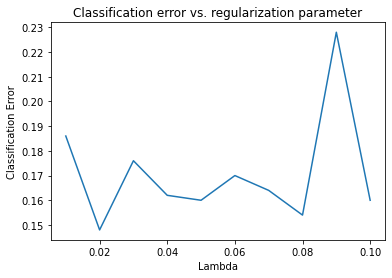

In [39]:
lamda = np.linspace(0.01, 0.1, 10)
num_epoch = 50
err = []
for i in range(len(lamda)):
    w = pegasos_sW(X_train, y_train, lamda[i], num_epoch)
    err.append(classification_error(w, X_test, y_test))
plt.plot(lamda, err)
plt.title('Classification error vs. regularization parameter')
plt.xlabel('Lambda')
plt.ylabel('Classification Error')

Text(0, 0.5, 'Classification Error')

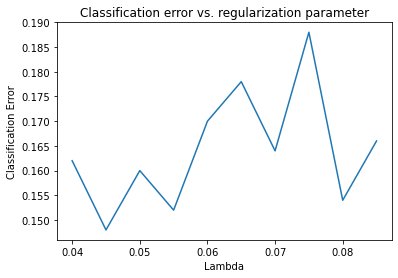

In [40]:
lamda = np.linspace(0.04, 0.085, 10)
num_epoch = 50
err = []
for i in range(len(lamda)):
    w = pegasos_sW(X_train, y_train, lamda[i], num_epoch)
    err.append(classification_error(w, X_test, y_test))
plt.plot(lamda, err)
plt.title('Classification error vs. regularization parameter')
plt.xlabel('Lambda')
plt.ylabel('Classification Error')

In [41]:
print('The tested regularization parameter that gives the lowest test error is', \
      np.round(lamda[err.index(np.min(err))], 4))

The tested regularization parameter that gives the lowest test error is 0.045


Note in this problem, because we shuffled our data when we loaded our data and also used train_test_split to split our training and testing sets, the above plots change everytime we run the entire code, even though the minimal error is always around 15%. Thus the tested regularization parameter that gives the lowest test error can change. I reload the data and split training data several times, and the resulting $\lambda$ often locates in the inteval of $[0.040,0.090]$. Therefore I think further zooming the range and observe values at a step smaller than 0.01 is not very effective.

**Problem 12**

In [42]:
w = pegasos_sW(X_train, y_train, 0.05, 50)
y_pred = [dotProduct(w, X_test[i]) for i in range(len(X_test))]

Text(0, 0.5, 'Frequency')

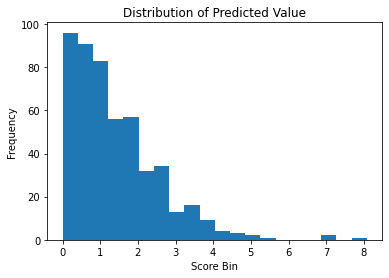

In [43]:
plt.hist(np.abs(y_pred), bins=20)
plt.title('Distribution of Predicted Value')
plt.xlabel('Score Bin')
plt.ylabel('Frequency')

In [44]:
y_group = np.abs(y_pred)
group_err = []
group = [0, 0.25, 0.5, 0.75, 1, 1.25]
for i in group:
    xx = []
    yy = []
    idx = np.array(np.where((y_group-i<0.25)&(y_group-i>=0)))
    for j in idx[0]:
        xx.append(X_test[j])
        yy.append(y_test[j])
    group_err.append(classification_error(w, xx, yy))

group = [1.5, 2, 2.5, 3, 3.5]
for i in group:
    xx = []
    yy = []
    idx = np.array(np.where((y_group-i<0.5)&(y_group-i>=0)))
    for j in idx[0]:
        xx.append(X_test[j])
        yy.append(y_test[j])
    group_err.append(classification_error(w, xx, yy))

xx = []
yy = []
idx = np.array(np.where(y_group >= 4))
for j in idx[0]:
    xx.append(X_test[j])
    yy.append(y_test[j])
group_err.append(classification_error(w, xx, yy))

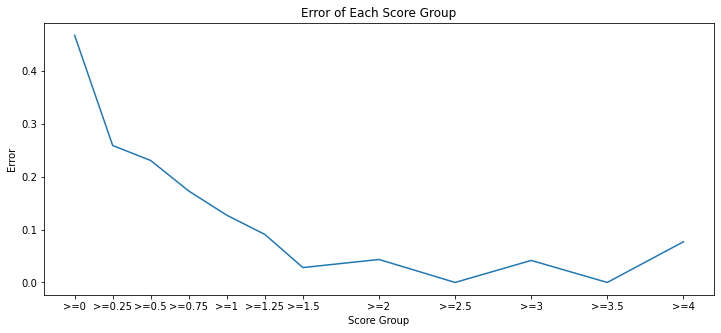

In [45]:
groupnum = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 2, 2.5, 3, 3.5, 4]
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(groupnum, group_err)
labels = ['>={}'.format(i) for i in groupnum]
ax.set_xticks(groupnum)
ax.set_xticklabels(labels)
ax.set_title('Error of Each Score Group')
ax.set_xlabel('Score Group')
ax.set_ylabel('Error')
fig.canvas.draw()
plt.show()

From the above plot, there is a correlation between higher score and classification error or accuracy. Generally as the magnitude of score increases, the classification error decreases and accuracy increases. The higher magnitude of the score shows the model is more confident about the prediction, and the point may be further away from the classification boundary. It is therefore reasonable to get such a correlation.

**Problem 13**

In [80]:
import pandas as pd

In [81]:
w = pegasos_sW(X_train, y_train, 0.05, 50)
prediction = np.zeros(len(y))
for i in range(len(y_test)):
    dp = dotProduct(w, X_test[i])
    if dp >= 0:
        prediction[i] = 1
    elif dp < 0:
        prediction[i] = -1
res = [abs(x-y)<0.001 for (x,y) in zip(y_test, prediction)]

In [142]:
idx = [i for i, x in enumerate(res) if not x][0]
temp = w
for j, v in temp.items():
    temp[j] = np.abs(w[j] * X_test[idx][j])
table = pd.DataFrame.from_records([temp, w, X_test[idx]])

In [154]:
table.rename({0:'score', 1:'weight', 2:'feature'}, inplace=True)
table.sort_values(by='score', ascending=False)

,score,weight,feature
the,1.415241e+39,1.415241e+39,62.0
of,5.011238e+30,5.011238e+30,26.0
and,1.778337e+28,1.778337e+28,20.0
to,4.103453e+27,4.103453e+27,19.0
in,2.740206e+27,2.740206e+27,20.0
...,...,...,...
arte,NaN,NaN,1.0
canada's,NaN,NaN,1.0
brazil's,NaN,NaN,1.0
hartley's,NaN,NaN,1.0


From the above table, we can see words that have higher scores are mostly stopwords which are not representative for the text. To avoid effect of stopwords, we can use TF-IDF instead of counting the number of occurence of the words. TF-IDF create features for term frequencies, and then normalize the frequencies by inverse document frequencies.

In [161]:
idx = [i for i, x in enumerate(res) if not x][1]
temp1 = w
for j, v in temp1.items():
    temp1[j] = np.abs(w[j] * X_test[idx][j])
idx = [i for i, x in enumerate(res) if not x][2]
temp2 = w
for j, v in temp2.items():
    temp2[j] = np.abs(w[j] * X_test[idx][j])
table = pd.DataFrame.from_records([temp1, temp2])

In [165]:
table.rename({0:'1st example', 1:'2nd example'}, inplace=True)
table = table.transpose()
table.sort_values(by='1st example', ascending=False)

,1st example,2nd example
the,3.918655e+45,3.918655e+45
of,4.331514e+35,4.331514e+35
and,5.508578e+32,5.508578e+32
to,2.668270e+32,2.668270e+32
in,7.919194e+31,7.919194e+31
...,...,...
incorrect,0.000000e+00,0.000000e+00
cracks,0.000000e+00,0.000000e+00
widereleases,0.000000e+00,0.000000e+00
sandler,0.000000e+00,0.000000e+00


The above analysis can also be demonstrated by these 2 other examples here. 

Other than TF-IDF, we may also directl remove the stopwords from the document if we have enough training data or if we are sure that removing them will not change the meaning of our texts.

# Kernel Methods

**Problem 14**

The ridge-regression estimator can be viewed as 2 parts
$$J_1(w)=||Xw-y||^2$$
$$J_2(w)=||w||^2$$
Both functions are convex and differentiable. For $w$ to be a minimizer of $J(w)$, we can take the derivative of J(w) with respect to w and the point when the derivative is 0 is of our interest.
$$\begin{split}\frac{\partial J(w)}{\partial w}&=\frac{\partial J_1(w)}{\partial w}+\frac{\partial J_2(w)}{\partial w}\\&=2X^T(Xw-y)+2\lambda Iw\\&=0\end{split}$$

Thus,$$\begin{split}2X^TXw+2\lambda Iw&=2X^Ty\\X^TXw+\lambda Iw&=X^Ty\end{split}$$

Note that $X^TX$ is symmetric and it is positive semidefinite or positive definite. If it is positive definite, it is already invertible. If it is positive semidefinite, its smallest possible eigenvalue is 0. 

For any $\lambda>0$, $\lambda I$ adds positive values to the diagonal of $X^TX$. This implies the eigenvalues of $X^TX+\lambda I$ are positive and makes the matrix to always be invertible.

Therefore, $$\begin{split}X^TXw+\lambda Iw&=X^Ty\\(X^TX+\lambda I)w&=X^Ty\\w&=(X^TX+\lambda I)^{-1}X^Ty\end{split}$$

**Problem 15**

$$\begin{split}X^TXw+\lambda Iw&=X^Ty\\\lambda Iw&=X^Ty-X^TXw\\w&=\frac{1}{\lambda}(X^Ty-X^TXw)\\w&=X^T(\frac{1}{\lambda}(y-Xw))\end{split}$$

So, the expression for $\alpha$ can be written as $$\alpha=\frac{1}{\lambda}(y-Xw)$$

**Problem 16**

The definition of the span of a set of vectors is that, suppose $\{v_1, v_2, ..., v_n\}$ is a set of vectors of the vector space V. Then the span of this set is the set of all linear combinations of the vectors, i.e. for any scalars $k_1, k_2, ...k_n$, $(k_1v_1+k_2v_2+...+k_nv_n)\in span(V)$.

Given the fact that $w=X^T\alpha$, $\alpha=\{a_1, a_2, ..., a_n\}$ with $a_1$ to $a_n$ are scalars and $\{x_1, x_2, ...x_n\}$ are columns of $X^T$. $w$ can be represented as a linear combination of the columns. This shows $w$ is in $span(X)$. Thus we can say $w$ is in the span of the data.

**Problem 17**

Since we have the expression $$w=\frac{1}{\lambda}(X^Ty-X^TXw)$$and given the face that $w=X^T\alpha$, we can substitute w and get
$$\begin{split}X^T\alpha&=\frac{1}{\lambda}(X^Ty-X^TXX^T\alpha)\\X^T\alpha&=\frac{1}{\lambda}X^T(y-XX^T\alpha)\\\alpha&=\frac{1}{\lambda}(y-XX^T\alpha)\\\lambda I\alpha+XX^T\alpha&=y\\\alpha&=(\lambda I+XX^T)^{-1}y\end{split}$$
Note from previous questions, we can also prove $\lambda I+XX^T$ is invertible so the equation holds.

**Problem 18**

We can show that the predicted values on the training points can be re-written into $$Xw=XX^T\alpha=XX^T(\lambda I+XX^T)^{-1}y$$

Here if we represent the kernel matrix by $K=XX^T$, the expression can be rewritten as 
$$Xw=K(\lambda I+K)^{-1}y$$

**Problem 19**

To clarify the symbols, we use $X$ to represent the training features, $Y$ the training y values, $x$ the new points, $w^*$ the optimal solution we find from $w^*=X^T\alpha$ and thus $\alpha=(\lambda I+XX^T)^{-1}Y$.

Also we define $$k_x=\begin{bmatrix}x^Tx_1\\...\\x^Tx_n\end{bmatrix}$$

From our previous questions, the new prediction $f(x)$ is in fact
$$\begin{split}f(x)&=x^Tw^*\\&=x^TX^T\alpha\\&=k_x\alpha\end{split}$$

**Problem 20**

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.spatial
import functools

%matplotlib inline

In [171]:
### Kernel function generators
def linear_kernel(X1, X2):
    """
    Computes the linear kernel between two sets of vectors.
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
    Returns:
        matrix of size n1xn2, with x1_i^T x2_j in position i,j
    """
    return np.dot(X1,np.transpose(X2))
 
def RBF_kernel(X1,X2,sigma):
    """
    Computes the RBF kernel between two sets of vectors   
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        sigma - the bandwidth (i.e. standard deviation) for the RBF/Gaussian kernel
    Returns:
        matrix of size n1xn2, with exp(-||x1_i-x2_j||^2/(2 sigma^2)) in position i,j
    """
    dist = scipy.spatial.distance.cdist(X1, X2, 'sqeuclidean')
    result = np.exp(-dist/(2*(sigma**2)))
    return result

def polynomial_kernel(X1, X2, offset, degree):
    """
    Computes the inhomogeneous polynomial kernel between two sets of vectors
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        offset, degree - two parameters for the kernel
    Returns:
        matrix of size n1xn2, with (offset + <x1_i,x2_j>)^degree in position i,j
    """
    base = offset + linear_kernel(X1, X2)
    result = base ** degree
    return result

**Problem 21**

In [75]:
X = np.array([-4, 1, 0, 2])
ln_kernel = linear_kernel(X, X)

In [76]:
print('Output of linear kernel matrix:', ln_kernel)

Output of linear kernel matrix: 21


**Problem 22**

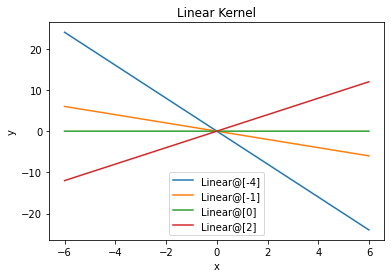

In [77]:
# PLot kernel machine functions
plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = linear_kernel(prototypes, xpts) 
for i in range(len(prototypes)):
    label = "Linear@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.title('Linear Kernel')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [78]:
y0 = np.array([2, 0, 3, 5]).reshape(-1,1)

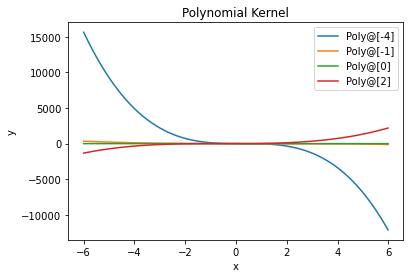

In [79]:
# (a)
y = polynomial_kernel(prototypes, xpts, 1, 3)
for i in range(len(prototypes)):
    label = "Poly@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.title('Polynomial Kernel')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

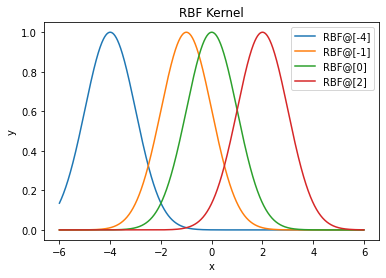

In [80]:
# (b)
y = RBF_kernel(prototypes, xpts, 1)
for i in range(len(prototypes)):
    label = "RBF@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.title('RBF Kernel')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Problem 23**

In [81]:
class Kernel_Machine(object):
    def __init__(self, kernel, training_points, weights):
        """
        Args:
            kernel(X1,X2) - a function return the cross-kernel matrix between rows of X1 and rows of X2 for kernel k
            training_points - an nxd matrix with rows x_1,..., x_n
            weights - a vector of length n with entries alpha_1,...,alpha_n
        """

        self.kernel = kernel
        self.training_points = training_points
        self.weights = weights
        
    def predict(self, X):
        """
        Evaluates the kernel machine on the points given by the rows of X
        Args:
            X - an nxd matrix with inputs x_1,...,x_n in the rows
        Returns:
            Vector of kernel machine evaluations on the n points in X.  Specifically, jth entry of return vector is
                Sum_{i=1}^R alpha_i k(x_j, mu_i)
        """
        vec = self.kernel(self.training_points, X)
        result = []
        for i in range(len(vec[0])):
            result.append(np.sum([x*y for x, y in zip(self.weights, np.array(vec[:, i])\
                                                      .reshape(-1, 1))]))
                
        return result

In [82]:
kernel = functools.partial(RBF_kernel, sigma=1)
weights = np.array([1, -1, 1])
prototypes = np.array([-1, 0, 1]).reshape(-1,1)

plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)

result = Kernel_Machine(kernel, prototypes, weights)
ypts = result.predict(xpts)

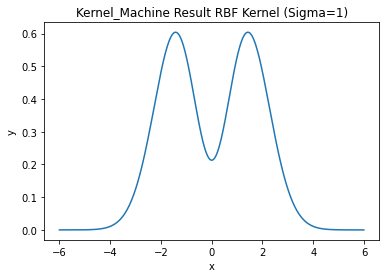

In [84]:
plt.plot(xpts, ypts)
plt.title('Kernel_Machine Result RBF Kernel (Sigma=1)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Problem 24**

In [85]:
data_train,data_test = np.loadtxt("krr-train.txt"),np.loadtxt("krr-test.txt")
x_train, y_train = data_train[:,0].reshape(-1,1),data_train[:,1].reshape(-1,1)
x_test, y_test = data_test[:,0].reshape(-1,1),data_test[:,1].reshape(-1,1)

Text(0, 0.5, 'y')

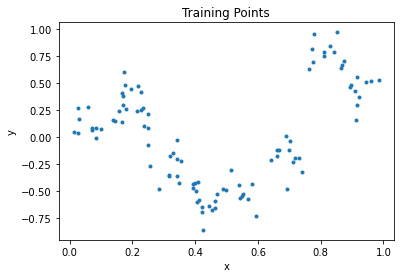

In [87]:
plt.plot(x_train, y_train, '.')
plt.title('Training Points')
plt.xlabel('x')
plt.ylabel('y')

**Problem 25**

In [88]:
def train_kernel_ridge_regression(X, y, kernel, l2reg):
    K = kernel(X, X)
    alpha = np.array(np.linalg.inv(l2reg*np.identity(len(K))+K) @ y).reshape(-1, 1)
    return Kernel_Machine(kernel, X, alpha)

**Problem 26**

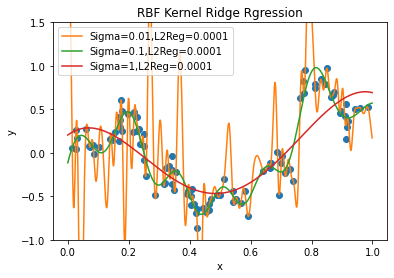

In [89]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
l2reg = 0.0001
for sigma in [.01,.1,1]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.title('RBF Kernel Ridge Rgression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

From the above plot, we can see that smaller sigma values (e.g. 0.01 in this problem) tend to have overfit and more sensitive to noises. The larger values, in this case sigma=1, are less likely to overfit.

**Problem 27**

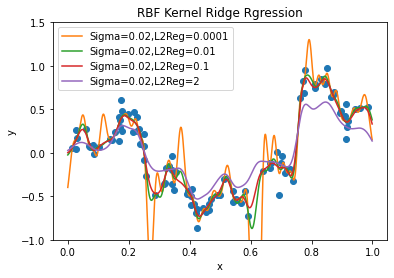

In [90]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
sigma= .02
for l2reg in [.0001,.01,.1,2]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.title('RBF Kernel Ridge Rgression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

As $\lambda\to\infty$, the function becomes less sensitive to noises, and thus has less potential to overfit. However, when $\lambda$ becomes too large, the function may also risk from underfitting, and thus does not provide a good fit as expected.

**Problem 28**

In [91]:
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class KernelRidgeRegression(BaseEstimator, RegressorMixin):  
    """sklearn wrapper for our kernel ridge regression"""
     
    def __init__(self, kernel="RBF", sigma=1, degree=2, offset=1, l2reg=1):        
        self.kernel = kernel
        self.sigma = sigma
        self.degree = degree
        self.offset = offset
        self.l2reg = l2reg 

    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.
        """
        if (self.kernel == "linear"):
            self.k = linear_kernel
        elif (self.kernel == "RBF"):
            self.k = functools.partial(RBF_kernel, sigma=self.sigma)
        elif (self.kernel == "polynomial"):
            self.k = functools.partial(polynomial_kernel, offset=self.offset,\
                                       degree=self.degree)
        else:
            raise ValueError('Unrecognized kernel type requested.')
        
        self.kernel_machine_ = train_kernel_ridge_regression(X, y, self.k, \
                                                             self.l2reg)

        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "kernel_machine_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return(self.kernel_machine_.predict(X))

    def score(self, X, y=None):
        # get the average square error
        return(((self.predict(X)-y)**2).mean()) 

In [291]:
from sklearn.model_selection import GridSearchCV,PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error,make_scorer
import pandas as pd
    
test_fold = [-1]*len(x_train) + [0]*len(x_test)   #0 corresponds to test, -1 to train
predefined_split = PredefinedSplit(test_fold=test_fold)

In [93]:
param_grid = [{'kernel': ['RBF'],'sigma':[.001,.01,.1,1,10,100], 'l2reg':\
               np.exp2(-np.arange(-10,10,1))},
              {'kernel':['polynomial'],'offset':[-10,-1,-0.1,0,0.1,1,10], \
               'degree':[2,3,4,10,20],'l2reg':[10,1,.1,.01,.001] },
              {'kernel':['linear'],'l2reg': [50,10,1,.1,.01,.001]}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False),
                    return_train_score=True
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=KernelRidgeRegression(),
             param_grid=[{'kernel': ['RBF'],
                          'l2reg': array([1.024000e+03, 5.120000e+02, 2.560000e+02, 1.280000e+02,
       6.400000e+01, 3.200000e+01, 1.600000e+01, 8.000000e+00,
       4.000000e+00, 2.000000e+00, 1.000000e+00, 5.000000e-01,
       2.500000e-01, 1.250000e-01, 6.250000e-02, 3.125000e-02,
       1.562500e-02, 7.812500e-03, 3.906250e-03, 1.953125e-03]),
                          'sigma': [0.001, 0.01, 0.1, 1, 10, 100]},
                         {'degree': [2, 3, 4, 10, 20], 'kernel': ['polynomial'],
                          'l2reg': [10, 1, 0.1, 0.01, 0.001],
                          'offset': [-10, -1, -0.1, 0, 0.1, 1, 10]},
                         {'kernel': ['linear'],
                          'l2reg': [50, 10, 1, 0.1, 0.01, 0.001]}],
             return_train_score=True,
             scoring=make_scorer(mean_squared_er

In [94]:
pd.set_option('display.max_rows', 20)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
cols_to_keep = ["param_degree", "param_kernel","param_l2reg" ,"param_offset","param_sigma",
        "mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
df_toshow.sort_values(by=["mean_test_score"])

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
116,-,RBF,0.001953,-,0.1,0.015125,0.015750
110,-,RBF,0.003906,-,0.1,0.015788,0.017034
104,-,RBF,0.007812,-,0.1,0.017049,0.018717
98,-,RBF,0.015625,-,0.1,0.018565,0.020445
85,-,RBF,0.062500,-,0.01,0.018622,0.005203
...,...,...,...,...,...,...,...
287,20,polynomial,0.010000,10,-,140.899370,5.448035
273,20,polynomial,1.000000,10,-,140.899370,5.448035
294,20,polynomial,0.001000,10,-,140.899370,5.448035
266,20,polynomial,10.000000,10,-,140.899370,5.448035


The following table only displays the best tested setting for each kernel.

In [95]:
RBF_idx = df_toshow[df_toshow['param_kernel']=='RBF']['mean_test_score'].idxmin()
poly_idx = df_toshow[df_toshow['param_kernel']=='polynomial']['mean_test_score'].idxmin()
ln_idx = df_toshow[df_toshow['param_kernel']=='linear']['mean_test_score'].idxmin()
df_toshow.loc[[RBF_idx, poly_idx, ln_idx]]

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
116,-,RBF,0.001953,-,0.1,0.015125,0.015750
293,20,polynomial,0.001000,1,-,0.029910,0.031096
297,-,linear,1.000000,-,-,0.164540,0.206506


The following tables display the best tested setting for each kernel and some nearby settings.

In [96]:
df_toshow.loc[RBF_idx-5:RBF_idx+3]

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
111,-,RBF,0.003906,-,1,0.062323,0.091025
112,-,RBF,0.003906,-,10,0.155350,0.197079
113,-,RBF,0.003906,-,100,0.164324,0.207028
114,-,RBF,0.001953,-,0.001,0.120711,0.000145
115,-,RBF,0.001953,-,0.01,0.023162,0.003101
116,-,RBF,0.001953,-,0.1,0.015125,0.015750
117,-,RBF,0.001953,-,1,0.061464,0.089266
118,-,RBF,0.001953,-,10,0.154173,0.195882
119,-,RBF,0.001953,-,100,0.162083,0.204710


In [97]:
df_toshow.loc[poly_idx-5:poly_idx+1]

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
288,20,polynomial,0.001,-10,-,99.084022,5.780622
289,20,polynomial,0.001,-1,-,0.090849,0.056974
290,20,polynomial,0.001,-0.1,-,0.173662,0.208702
291,20,polynomial,0.001,0,-,0.151705,0.190801
292,20,polynomial,0.001,0.1,-,0.121631,0.160897
293,20,polynomial,0.001,1,-,0.029910,0.031096
294,20,polynomial,0.001,10,-,140.899370,5.448035


In [98]:
df_toshow.loc[ln_idx-1:ln_idx+5]

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
296,-,linear,10.000,-,-,0.164591,0.206780
297,-,linear,1.000,-,-,0.164540,0.206506
298,-,linear,0.100,-,-,0.164565,0.206501
299,-,linear,0.010,-,-,0.164569,0.206501
300,-,linear,0.001,-,-,0.164569,0.206501


**Problem 29**

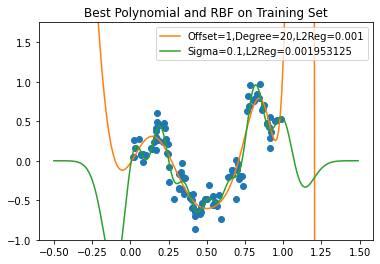

In [100]:
## Plot the best polynomial and RBF fits you found
plot_step = .01
xpts = np.arange(-.5 , 1.5, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
#Plot best polynomial fit
offset= df_toshow.loc[poly_idx, 'param_offset']
degree = df_toshow.loc[poly_idx, 'param_degree']
l2reg = df_toshow.loc[poly_idx, 'param_l2reg']
k = functools.partial(polynomial_kernel, offset=offset, degree=degree)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Offset="+str(offset)+",Degree="+str(degree)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
#Plot best RBF fit
sigma = df_toshow.loc[RBF_idx, 'param_sigma']
l2reg= df_toshow.loc[RBF_idx, 'param_l2reg']
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.75)
plt.title('Best Polynomial and RBF on Training Set')
plt.show()

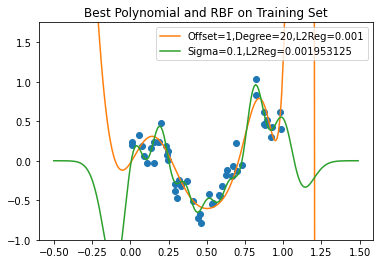

In [101]:
## Plot the best polynomial and RBF fits you found
plot_step = .01
xpts = np.arange(-.5 , 1.5, plot_step).reshape(-1,1)
plt.plot(x_test,y_test,'o')
#Plot best polynomial fit
offset= df_toshow.loc[poly_idx, 'param_offset']
degree = df_toshow.loc[poly_idx, 'param_degree']
l2reg = df_toshow.loc[poly_idx, 'param_l2reg']
k = functools.partial(polynomial_kernel, offset=offset, degree=degree)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Offset="+str(offset)+",Degree="+str(degree)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
#Plot best RBF fit
sigma = df_toshow.loc[RBF_idx, 'param_sigma']
l2reg= df_toshow.loc[RBF_idx, 'param_l2reg']
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.75)
plt.title('Best Polynomial and RBF on Test Set')
plt.show()

Both models perform well within the range of the training data, but have very different predictions out of the training range. Since in this problem we have training and testing data locating in the same range, having the same trend, and splitted relatively even across the range, the prediction error can be very small. We tried a very large range of parameters. Among all tested parameters, the regularization parameter for both models are relatively small. Since the regularization parameter add bias to trade for decreasing variance, it is understandable to be relatively small for this dataset. Due to similar reason the higher degree of the polynomial kernel is acceptable here. The offset and sigma hyperparameters also correspond to the comments we have in the previous problems. Both of them are moderate, and changing any of them lead to significantly increasing error. Moreover, even slight changes in the parameters to any direction can give very different results.

**Problem 30**

The definition of Bayes prediction function $f^*:X\to A$ is a function that achieves the minimal risk among all possible functions, i.e.$f^*\in arg\min_fR(f)$

The definition of Bayes risk for a prediction function $f:X\to A$ is $$R(f)=E_{(x,y)~P_{x\times y}}[l(f(x), y)]$$

In this problem, in the final point $(x, f(x)+\epsilon)$, $\epsilon$ is an additive random noise generated from distribution $N(0, 0.1^2)$. Therefore, the Bayes decision function for these points are $f^*=f(x)$, and the corresponding Bayes risk is $$\begin{split}R(f)&=E_{(x,y)~P_{x\times y}}[l(f(x), y)]\\&=E((f(x)-f(x)-\epsilon)^2)\\&=E(\epsilon^2)\\&=Var(\epsilon)+(E(\epsilon))^2\\&=0.1^2\end{split}$$

# Kernel SVMs with Kernelized Pegasos

**Problem 31**

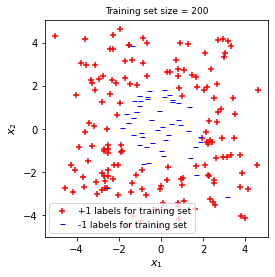

In [177]:
# Load and plot the SVM data
#load the training and test sets
data_train,data_test = np.loadtxt("svm-train.txt"),np.loadtxt("svm-test.txt")
x_train, y_train = data_train[:,0:2], data_train[:,2].reshape(-1,1)
x_test, y_test = data_test[:,0:2], data_test[:,2].reshape(-1,1)

#determine predictions for the training set
yplus = np.ma.masked_where(y_train[:,0]<=0, y_train[:,0])
xplus = x_train[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_train[:,0]>0, y_train[:,0])
xminus = x_train[~np.array(yminus.mask)]

#plot the predictions for the training set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 

pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='r', \
                     label = '+1 labels for training set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', \
                      label = '-1 labels for training set')

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

From the above plot, the data are not linearly separable. Most data points with -1 labels are in the center of the plot, surrounded by points with +1 label. It seems to be quadratically separable since the points may be separated by a circle. In this case, RBF, or radial basis function, kernel, can be a helpful tool for separation, because it uses an exponential term and the expansion of such terms gives infinite power. The main motivation for RBF is often to get a quadratic, cubic or any polynomial equation of large degree for our classification/regression line.

**Problem 32**

In [294]:
def kernel_pegasos(X_train, y_train, lamda, num_epoch, kernel):
    alpha = np.zeros(len(X_train))

    iterate = 1
    while iterate < num_epoch+1:
        ridx = np.random.choice(np.arange(len(X_train)))
        Xit = np.array(X_train[ridx]).reshape(-1,1)
        yit = y_train[ridx]
        const = 1 / (lamda*iterate)
        k = [kernel(Xit, np.array(X).reshape(-1, 1)) for X in X_train]
        summ = np.sum([alpha[j]*y_train[j]*k[j] for j in np.arange(len(X_train))])
        if yit*const*summ < 1:
            alpha[ridx] += 1
        iterate += 1
    return alpha

**Problem 33**

In [295]:
def pred_kernel_pegasos(alpha, x_check, x_train, y_train, y_check, kernel):
    y_pred = []
    for i in range(len(x_check)):
        temp = 0
        for j in range(len(x_train)):
            K = kernel(x_train[j].reshape(1, -1), x_check[i].reshape(1, -1))
            temp += alpha[j]*y_train[j]*K[0]
        if temp < 0:
            sign = -1
        else:
            sign = 1
        y_pred.append(sign)
    
    check = [np.abs(i-j)<0.001 for i, j in zip(y_pred, y_check)]
    err = 1-np.sum(check)/len(check)
    return y_pred, err

In [313]:
x_train, y_train = data_train[:,0:2], data_train[:,2].reshape(-1,1)
x_test, y_test = data_test[:,0:2], data_test[:,2].reshape(-1,1)
num_epoch = 100
sig = [0.01, 0.1, 1, 10]
lamda = [0.001, 0.01, 0.1, 1, 10]
data = []
for s in sig:
    kernel = functools.partial(RBF_kernel, sigma=s)
    for l in lamda:
        alpha = kernel_pegasos(x_train, y_train, l, num_epoch, kernel)
        y_pred_train, trainerr = pred_kernel_pegasos(alpha, x_train, x_train, \
                                                     y_train, y_train, kernel)
        y_pred_test, testerr = pred_kernel_pegasos(alpha, x_test, x_train, \
                                                   y_train, y_test, kernel)
        data.append(['RBF', s, l, trainerr, testerr])

In [314]:
table = pd.DataFrame(data, columns=['kernel', 'param_sigma', 'param_l2reg', \
                                    'training_error', 'test_error'])
table

,kernel,param_sigma,param_l2reg,training_error,test_error
0,RBF,0.01,0.001,0.100,0.14750
1,RBF,0.01,0.010,0.080,0.12875
2,RBF,0.01,0.100,0.090,0.13000
3,RBF,0.01,1.000,0.095,0.14250
4,RBF,0.01,10.000,0.135,0.15750
5,RBF,0.10,0.001,0.105,0.14875
6,RBF,0.10,0.010,0.060,0.10000
7,RBF,0.10,0.100,0.050,0.08875
8,RBF,0.10,1.000,0.055,0.06625
9,RBF,0.10,10.000,0.125,0.15500


In [315]:
rbf_idx = table['test_error'].idxmin()
table.loc[rbf_idx]

kernel               RBF
param_sigma            1
param_l2reg          0.1
training_error     0.065
test_error        0.0575
Name: 12, dtype: object

In [307]:
num_epoch = 100
off = [0.01, 0.1, 1, 10]
lamda = [0.001, 0.01, 0.1, 1, 10]
deg = [2, 3, 4, 10]
data = []
for o in off:
    for d in deg:
        kernel = functools.partial(polynomial_kernel, offset=o, degree=d)
        for l in lamda:
            alpha = kernel_pegasos(x_train, y_train, l, num_epoch, kernel)
            y_pred_train, trainerr = pred_kernel_pegasos(alpha, x_train, x_train, \
                                                         y_train, y_train, kernel)
            y_pred_test, testerr = pred_kernel_pegasos(alpha, x_test, x_train, \
                                                       y_train, y_test, kernel)
            data.append(['Polynomial', o, d, l, trainerr, testerr])

In [308]:
table = pd.DataFrame(data, columns=['kernel', 'param_offset', 'param_degree', \
                                    'param_l2reg', 'training_error', 'test_error'])
table

,kernel,param_offset,param_degree,param_l2reg,training_error,test_error
0,Polynomial,0.01,2,0.001,0.240,0.22000
1,Polynomial,0.01,2,0.010,0.240,0.22000
2,Polynomial,0.01,2,0.100,0.240,0.22000
3,Polynomial,0.01,2,1.000,0.240,0.22000
4,Polynomial,0.01,2,10.000,0.240,0.22000
...,...,...,...,...,...,...
75,Polynomial,10.00,10,0.001,0.130,0.14250
76,Polynomial,10.00,10,0.010,0.165,0.14875
77,Polynomial,10.00,10,0.100,0.170,0.14500
78,Polynomial,10.00,10,1.000,0.115,0.14250


In [309]:
poly_idx = table['test_error'].idxmin()
table.loc[poly_idx]

kernel            Polynomial
param_offset              10
param_degree               3
param_l2reg                1
training_error         0.095
test_error           0.07125
Name: 68, dtype: object

In [310]:
num_epoch = 100
lamda = [0.001, 0.01, 0.1, 1, 10]
data = []
kernel = functools.partial(linear_kernel)
for l in lamda:
    alpha = kernel_pegasos(x_train, y_train, l, num_epoch, kernel)
    y_pred_train, trainerr = pred_kernel_pegasos(alpha, x_train, x_train, \
                                                 y_train, y_train, kernel)
    y_pred_test, testerr = pred_kernel_pegasos(alpha, x_test, x_train, \
                                               y_train, y_test, kernel)
    data.append(['Linear', l, trainerr, testerr])

In [311]:
table = pd.DataFrame(data, columns=['kernel', 'param_l2reg', \
                                    'training_error', 'test_error'])
table

,kernel,param_l2reg,training_error,test_error
0,Linear,0.001,0.490,0.50000
1,Linear,0.010,0.485,0.49250
2,Linear,0.100,0.435,0.50750
3,Linear,1.000,0.440,0.50375
4,Linear,10.000,0.445,0.49875


In [312]:
ln_idx = table['test_error'].idxmin()
table.loc[ln_idx]

kernel            Linear
param_l2reg         0.01
training_error     0.485
test_error        0.4925
Name: 1, dtype: object

**Problem 34**

In [316]:
# Code to help plot the decision regions
# (Note: This ode isn't necessarily entirely appropriate for the questions asked. So think about what you are doing.)
 
sigma=1
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_soft_svm(x_train, y_train, k, ...)

#determine the decision regions for the predictions
x1_min = min(x_test[:,0])
x1_max= max(x_test[:,0])
x2_min = min(x_test[:,1])
x2_max= max(x_test[:,1])
h=0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#determine the predictions for the test set
y_bar = f.predict (x_test) 
yplus = np.ma.masked_where(y_bar<=0, y_bar)
xplus = x_test[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_bar>0, y_bar)
xminus = x_test[~np.array(yminus.mask)]

#plot the learned boundary and the predictions for the test set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 
decision =ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='b', \
                     label = '+1 prediction for test set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', \
                      label = '-1 prediction for test set')
ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('SVM with RBF Kernel: training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

NameError: name 'train_soft_svm' is not defined